## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [ ]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

easyvisadata = pd.read_csv(io.BytesIO(uploaded['EasyVisa.csv']))

Saving EasyVisa.csv to EasyVisa.csv


## Overview of the Dataset

In [ ]:
easyvisadata.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
easyvisadata.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
easyvisadata.shape

(25480, 12)

**Observation**
* There are 25,480 rows and 12 columns in the data set

In [ ]:
easyvisadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


##Statistical Summary

In [ ]:
easyvisadata.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observations**
* Average number of employees in a company is 5667, the max is 602069 (seems like a lot)
* The establishment year of the companies ranges from 1976 to 2016, with the median being 1997 and the average being 1979
* The average prevailing wage is 74,455.  The minimum is 2.13 might be an error and the max is 319210.27

##Check for duplicate values

In [ ]:
easyvisadata.duplicated().sum()

0

**Observation**
* There are no duplicate values

##Check for missing values

In [ ]:
easyvisadata.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Observation**
* There are no missing values

##Drop Column with unique values

In [ ]:
easyvisadata.case_id.nunique()

25480

**Observation**
* All case Id numbers are unique and can be dropped

In [ ]:
easyvisadata = easyvisadata.drop(["case_id"], axis=1)

In [ ]:
# Making a list of all catrgorical variables
cat_col = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position",
    "case_status"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(easyvisadata[column].value_counts())
    print("-" * 40)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
----------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
----------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
----------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
----------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
----------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
----------------------------------------
Y    22773
N     2707
Name: full_time_position, dtype: int64
----------------------------------------
Certified

In [ ]:
easyvisadata.describe(include='object').T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


**Observations**
* 6 continents are represented and the most frequent is Asia
* Most people have job experience and do not require training
* Most peoples wage is measured by year
* Most people are full time


##Exploratory Data Analysis

###Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##Observations on Continent

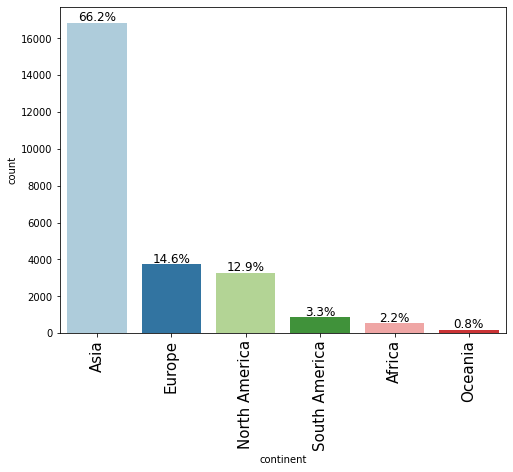

In [ ]:
labeled_barplot(easyvisadata, "continent", perc=True)

**Observation**
* Two-thirds of the applicants are from Asia

##Observations on Education of Employee

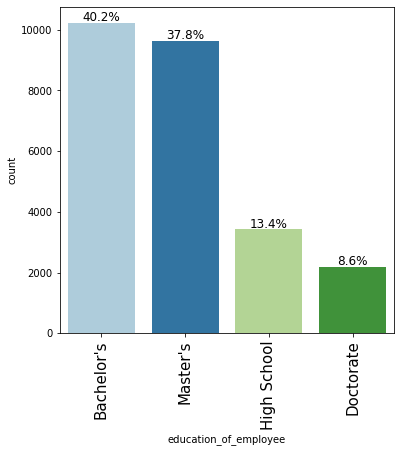

In [ ]:
labeled_barplot(easyvisadata, "education_of_employee", perc=True)

**Observation**
* Most people have a bachelor's, Master's, or Doctorate degree
* A few don't have college education

##Observations of job experience

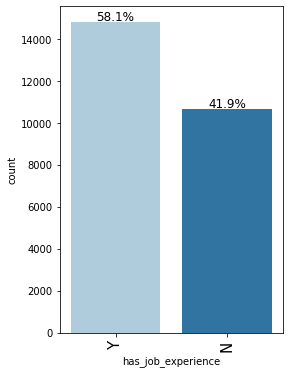

In [ ]:
labeled_barplot(easyvisadata, "has_job_experience", perc=True)

**Observation**
* 58% of people have job experience

##Observations on job training requirements

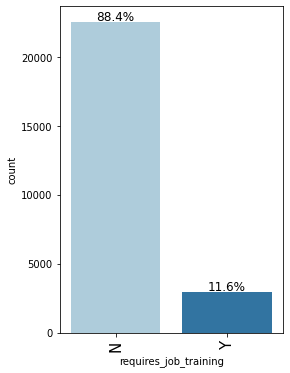

In [ ]:
labeled_barplot(easyvisadata, "requires_job_training", perc=True)

**Observation**
* Most people do not require job training

##Observations on number of employees

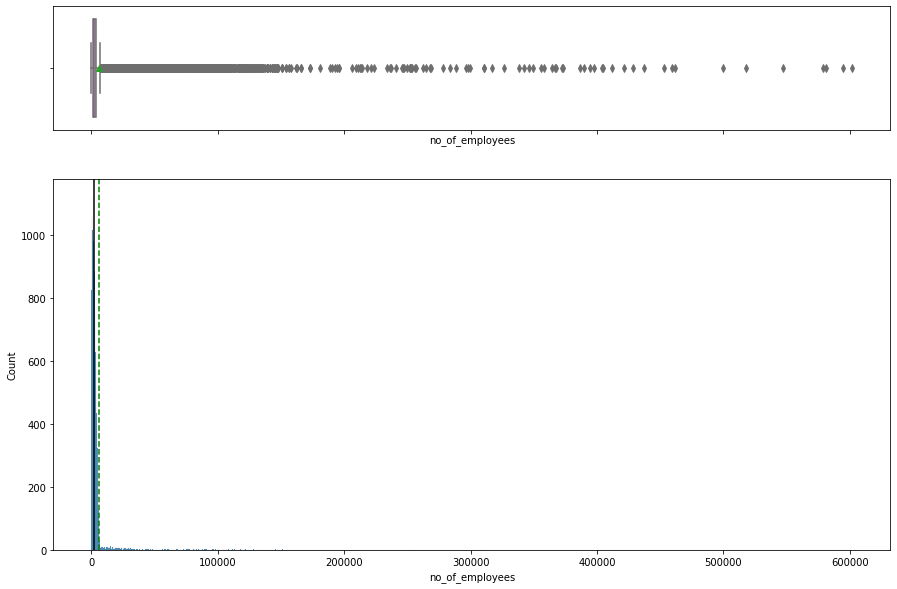

In [ ]:
histogram_boxplot(easyvisadata, "no_of_employees")


**Observations**
* Data is very skewed on employee numbers
* Data is skewed right
* There are a lot of outliers

##Observations on years of company establishment

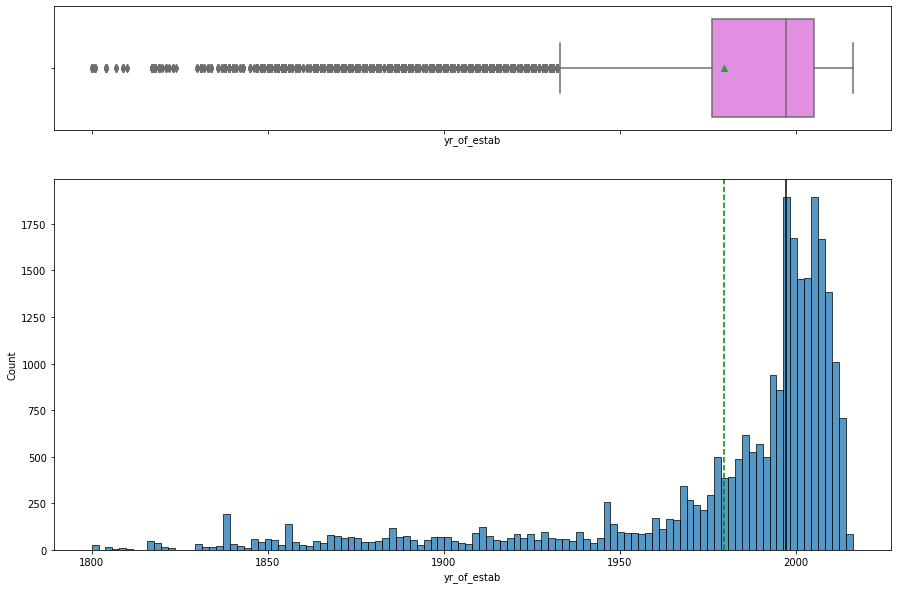

In [ ]:
histogram_boxplot(easyvisadata, "yr_of_estab")

In [ ]:
easyvisadata.yr_of_estab.mode()

0    1998
dtype: int64

**Observation**
* Data is skewed left
* Most of the businesses have been started after 1998
* lots of outliers

##Observations on region of employment

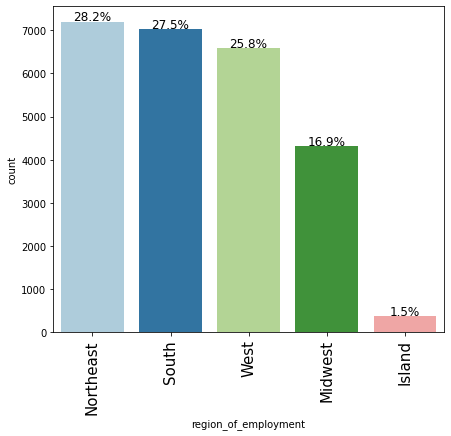

In [ ]:
labeled_barplot(easyvisadata, "region_of_employment", perc=True)

**Observations**
* More than three quarters of the applicants are employed in the Northeast, South, West regions.
* Very few are employed in the Islands

##Observations of prevailing wage

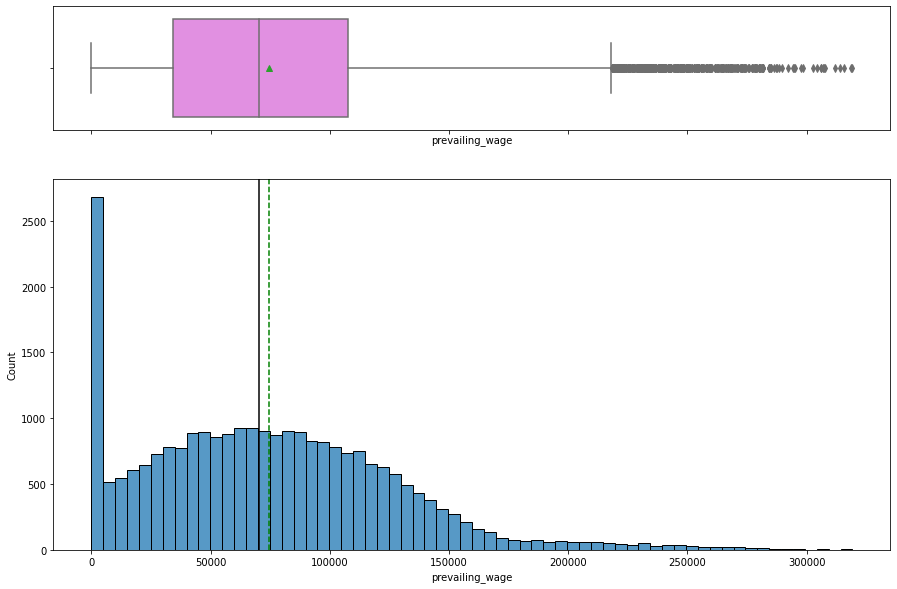

In [ ]:
histogram_boxplot(easyvisadata, "prevailing_wage")

**Observations**
* Data is skewed right
* There are a lot of values set to 0
* There are a lot of outliers

##Observations of unit of wage

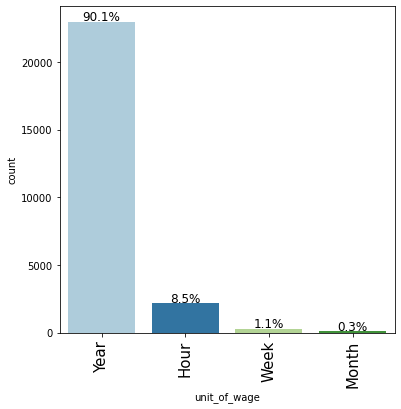

In [ ]:
labeled_barplot(easyvisadata, "unit_of_wage", perc=True)

**Observation**
* The majority of people are paid on a yearly salary

##Observations on full time position

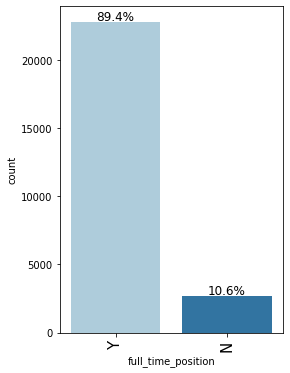

In [ ]:
labeled_barplot(easyvisadata, "full_time_position", perc=True)

**Observations**
* Almost 90% of applicants are employed full time

##Observations on Case Status

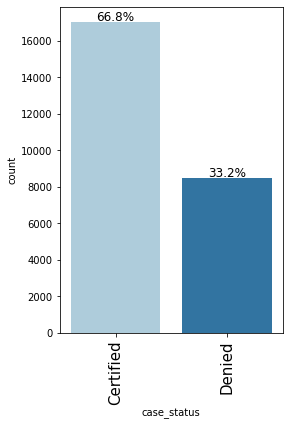

In [ ]:
labeled_barplot(easyvisadata, "case_status", perc=True)

**Observations**
* Two thirds of the applicants are certified

##Bivariate Analysis

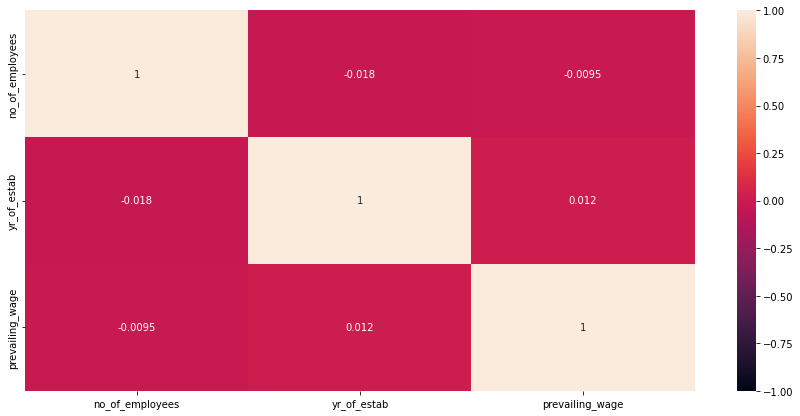

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(easyvisadata.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

**Observation**
* No real correlation between any of these values.

##Case Status Vs. Prevailing Wage

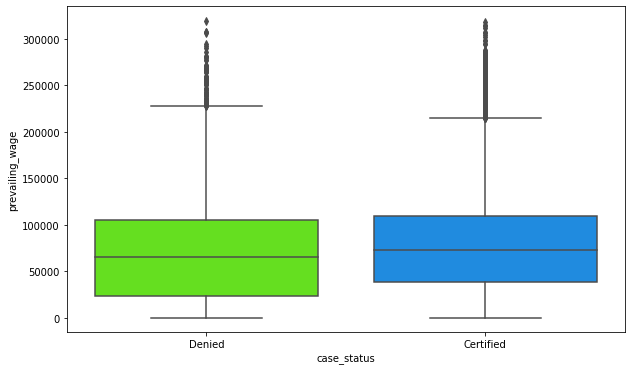

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=easyvisadata, x="case_status", y="prevailing_wage", palette="gist_rainbow"
)
plt.show()

**Observation**
* The median wage is slightly higher for the certified applicants

##Case Status & Number of Employees

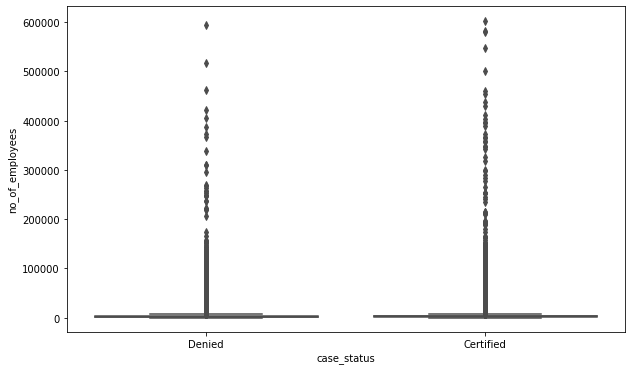

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=easyvisadata, x="case_status", y="no_of_employees", palette="gist_rainbow"
)
plt.show()

**Observations**
* no notable difference between application status off of number of employees

##Case Status & Full-time Employment

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


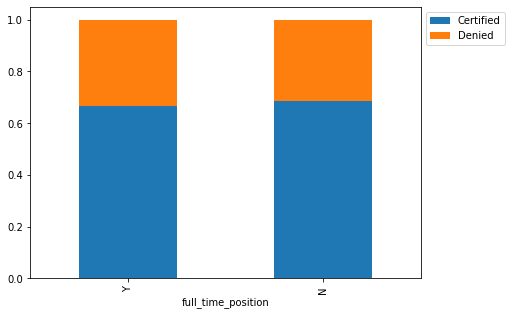

In [ ]:
stacked_barplot(easyvisadata, "full_time_position", "case_status")

**Observations**
* Almost twice as many applicants are certified have full time positions
* The ratio between status and full time or not seems to be pretty similar

##Case Status and Unit of Wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


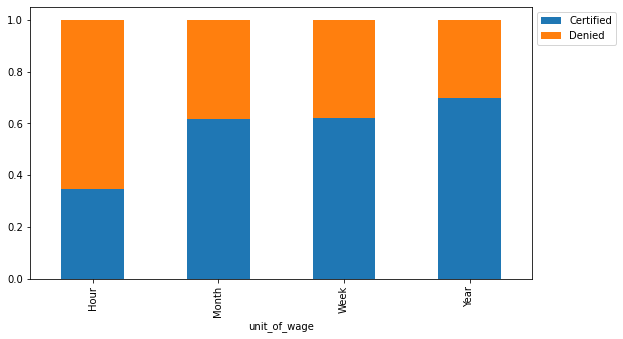

In [ ]:
stacked_barplot(easyvisadata, "unit_of_wage", "case_status")

**Observations**
* The highest unit of wage that are certified is the yearly group.
* Hourly is the least certified group percentage wise.
* Monthly is the least certified group by numbers.

##Case Status and Region of Employment

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


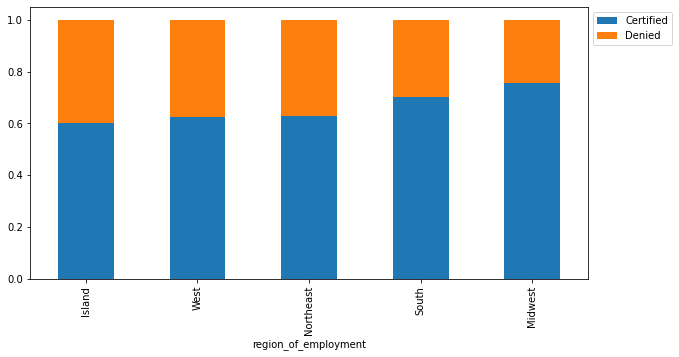

In [ ]:
stacked_barplot(easyvisadata, "region_of_employment", "case_status")

**Observations**
* The midwest region has the largest percentage of certified applicants.
* The Island region has the least percentage of certified applicants.
* The south has the most certified applicants

###Case Status and Experience

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


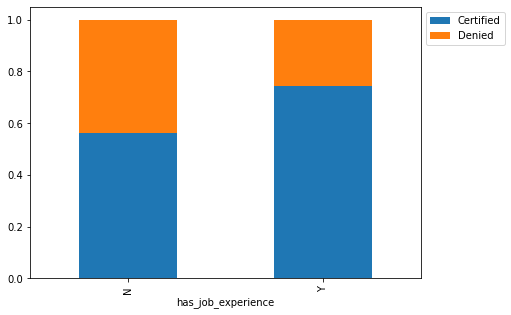

In [ ]:
stacked_barplot(easyvisadata, "has_job_experience", "case_status")

**Observations**
* More experienced people are certified

###Case Status Vs Requires Job Training

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


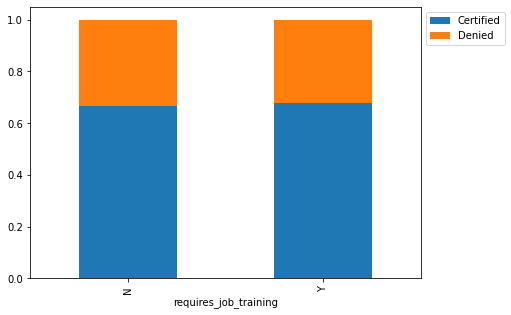

In [ ]:
stacked_barplot(easyvisadata, "requires_job_training", "case_status")

**Observations**
* Most applicants do not require training
* The ratio of applicants certified is pretty similar whether training is required or not.

###Case Status & Education

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


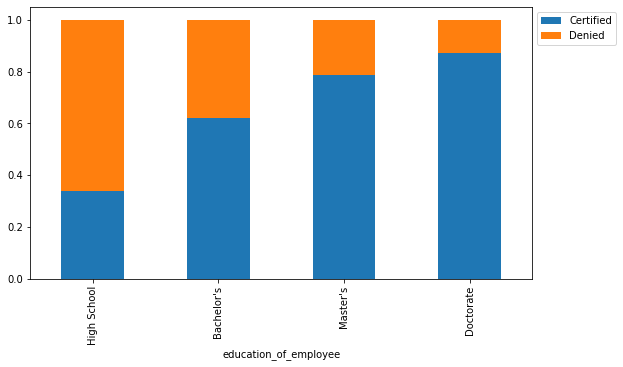

In [ ]:
stacked_barplot(easyvisadata, "education_of_employee", "case_status")

**Observations**
* The highest percentage of applicants that are certified have a Doctorate
* The largest group of people applying have a Master's degree
* The ratio of people with high school education is the lowest certified rate

###Case Status and Continent

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


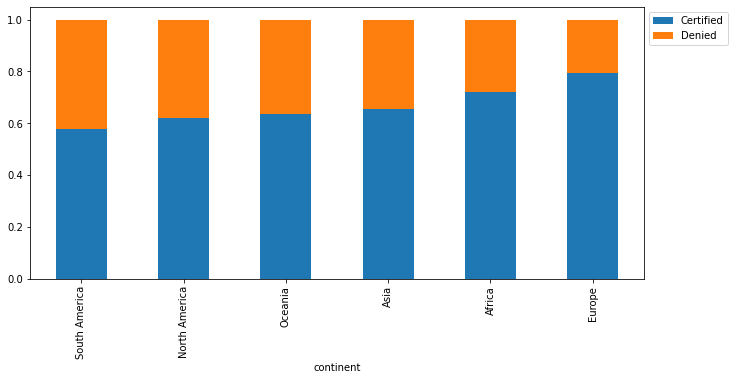

In [ ]:
stacked_barplot(easyvisadata, "continent", "case_status")

**Observations**
* The highest certified ratio is from Europe
* The lowest certified ratio is from South America
* The highest number of applicants comes from Asia
* The lowest number of applicants comes from Oceania

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

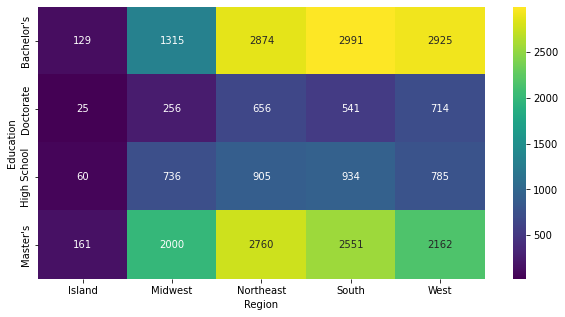

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(easyvisadata.education_of_employee, easyvisadata.region_of_employment),
    annot=True,
    fmt="g",
    cmap="viridis"
) ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

**Observations**
* The Island region has the least number of applicants
* The Midwest has a large number of master's applicants in comparison to Bachelor's
* The Northeast, South, and West have more Bachelor's than Master's for applicants

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

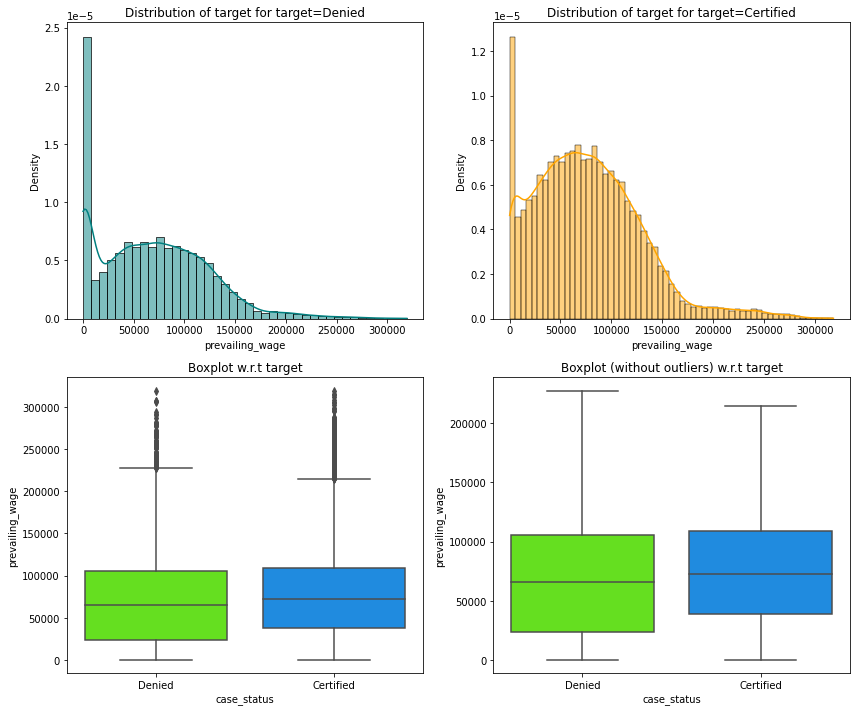

In [ ]:
distribution_plot_wrt_target(easyvisadata, "prevailing_wage","case_status")

**Observations**
* The prevailing wage range of applicants denied is more varying than that of certified
* The median prevailing wage is higher for the certified group

#### Checking if the prevailing wage is similar across all the regions of the US

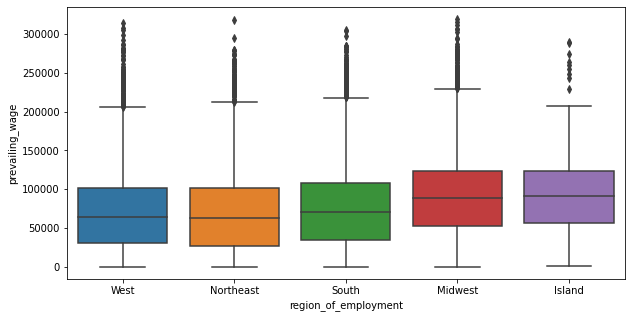

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=easyvisadata["region_of_employment"], y=easyvisadata["prevailing_wage"]) ## Complete the code to create boxplot for region of employment and prevailing wage
plt.show()

**Observations**
* The median prevailing wage is higher in the Midwest and Island
* The median prevailing wage is lower in the West and Northeast

## Data Preprocessing

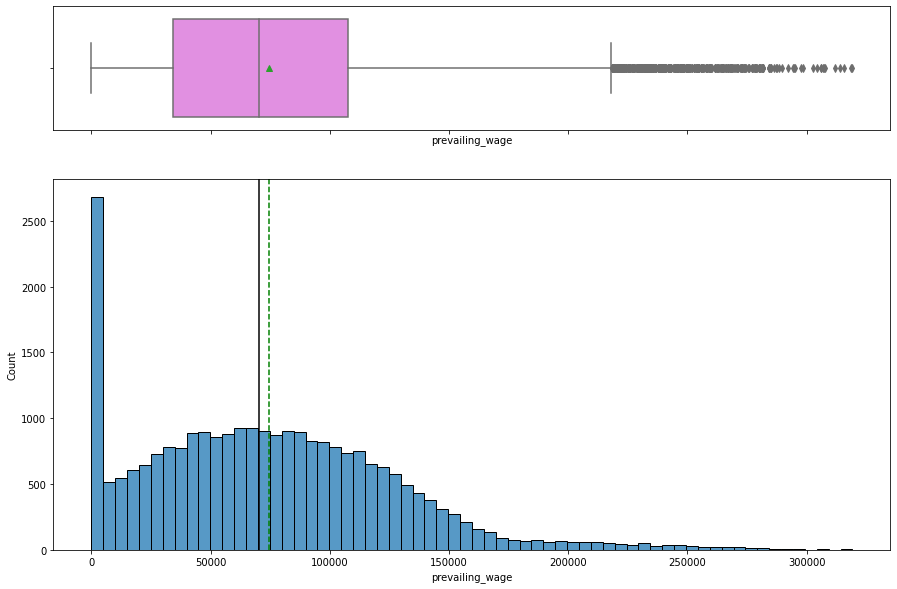

In [ ]:
#replace the 0 values in prevailing wage with the median
easyvisadata.loc[easyvisadata.prevailing_wage == 0, 'prevailing_wage'] = easyvisadata.prevailing_wage.median()
#easyvisadata["prevailing_wage"]=easyvisadata["prevailing_wage"].replace(0,easyvisadata["prevailing_wage"].mean())

histogram_boxplot(easyvisadata, "prevailing_wage")

In [ ]:
easyvisadata.loc[easyvisadata.prevailing_wage == 0, 'prevailing_wage'].shape

(0,)

*There are no 0 prevailing wage values.

#### Fixing the negative values in number of employees columns

In [ ]:
easyvisadata.loc[easyvisadata.no_of_employees < 0, 'prevailing_wage'].shape ## check negative values in the employee column

(33,)

In [ ]:
# taking the absolute values for number of employees
easyvisadata["no_of_employees"] = abs(easyvisadata["no_of_employees"]) ## Write the function to convert the values to a positive number

In [ ]:
easyvisadata.loc[easyvisadata.no_of_employees < 0, 'prevailing_wage'].shape

(0,)

### Outlier Check

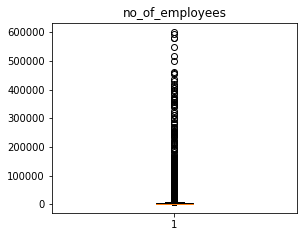

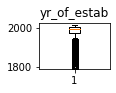

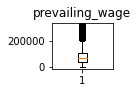

In [ ]:
# outlier detection using boxplot
numeric_columns = easyvisadata.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(easyvisadata[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    plt.show()

**Observations**
* While there are outliers we will not treat them as they are actual data

In [ ]:
#assign the value of 1 for all certified applicants and 0 for denied
easyvisadata["case_status"] = easyvisadata["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = easyvisadata.drop("case_status", axis = 1) ## code to drop case status from the data
Y = easyvisadata["case_status"]


X = pd.get_dummies(X, drop_first=True)  ##code to create dummies for X 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.663602
0    0.336398
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.677917
0    0.322083
Name: case_status, dtype: float64


###Model Evaluation Criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.66405  0.742184   0.757385  0.749708


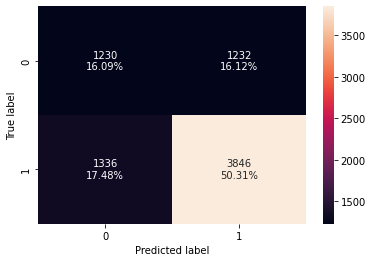

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

**Observations**
* As expected the decision tree is overfitting.  The training data has 100% accuracy, but the testing set does not.

##Hyperparameter Tuning

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight="balanced",random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,16,5), 
              'min_samples_leaf': [3, 5, 7 ],
              'max_leaf_nodes' : [2, 5],
              'min_impurity_decrease': [0.0001,0.001]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=1, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.70795  0.931734   0.714758  0.808949
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.717295  0.931301   0.727794  0.817066


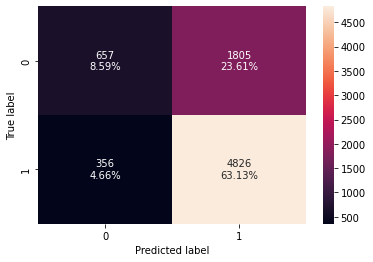

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

**Observation**
* Model is fitting the data pretty well
* The testing data is performing better than the trained data for all scores

## Building bagging and boosting models

###Bagging Model

Training performance:
    Accuracy    Recall  Precision        F1
0  0.984526  0.985468   0.991162  0.988307
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.696102  0.773061   0.777411  0.77523


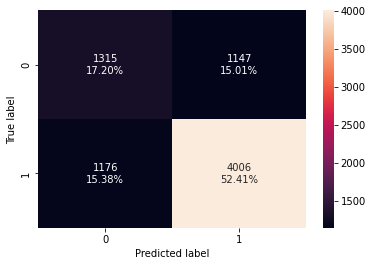

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

**Observations**
* Data appears to be overfitting

##Tuning Bagging Classifier

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.9], 
              'max_features': [0.7, 0.9],
              'n_estimators' : [90,110,10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994371  0.997135
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733909  0.899074   0.755105  0.820825


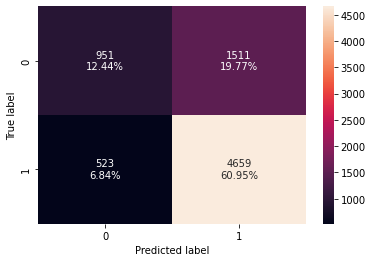

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

##Insights
* Data appears to be overfitting

### Random Forest

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.727368  0.833655   0.779502  0.80567


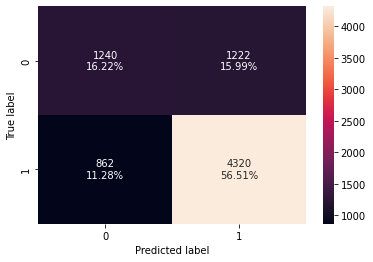

In [ ]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

##Hypertuned Random Forest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

##Insights
* Model is fitting the data nicely

###Boosting Models

##AdaBoost

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.737441  0.885941    0.75881  0.817462
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.738488  0.885951   0.765294  0.821215


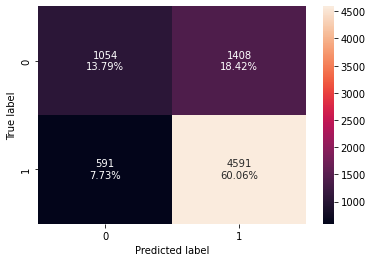

In [ ]:
#Calculating different metrics
abc_train_perf=model_performance_classification_sklearn(abc,X_train,y_train)
print("Training performance:\n",abc_train_perf)
abc_test_perf=model_performance_classification_sklearn(abc,X_test,y_test)
print("Testing performance:\n",abc_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc, X_test, y_test)

##Insights
* Model is fitting the data nicely

## Hyperparameter Tuning AdaBoost Classifier

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, class_weight="balanced",random_state=1),DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1)],
    "n_estimators": np.arange(80,101,10),
    "learning_rate":np.arange(0.1,0.4,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.718042  0.780162    0.79187  0.785973
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.718472  0.783674   0.797526  0.790539


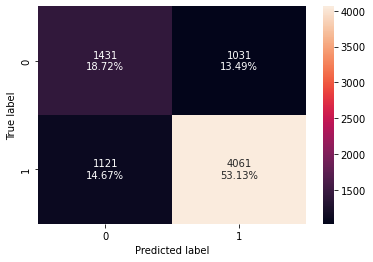

In [ ]:
#Calculating different metrics
abc_tuned_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n",abc_tuned_train_perf)
abc_tuned_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance:\n",abc_tuned_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

### Insights
* Tuned model is performing slightly better than the un-tuned model

##Gradient Boost

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755607  0.876479   0.781704  0.826383
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.751308  0.870513   0.785752  0.825964


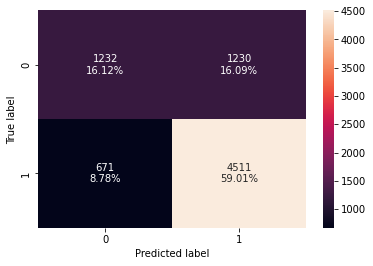

In [ ]:
#Calculating different metrics
gbc_train_perf=model_performance_classification_sklearn(gbc,X_train,y_train)
print("Training performance:\n",gbc_train_perf)
gbc_test_perf=model_performance_classification_sklearn(gbc,X_test,y_test)
print("Testing performance:\n",gbc_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc, X_test, y_test)

##Tuning GBC Boost

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [200,250],
    "subsample":[0.9,1],
    "max_features":[0.8,0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.760933  0.87707   0.787036  0.829617
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.750262  0.864724    0.78766  0.824395


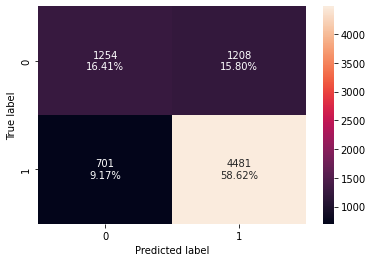

In [ ]:
#Calculating different metrics
gbc_tuned_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_train_perf)
gbc_tuned_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

### Insights
* Gradient Boost tuning and not tuned models have very similar performance

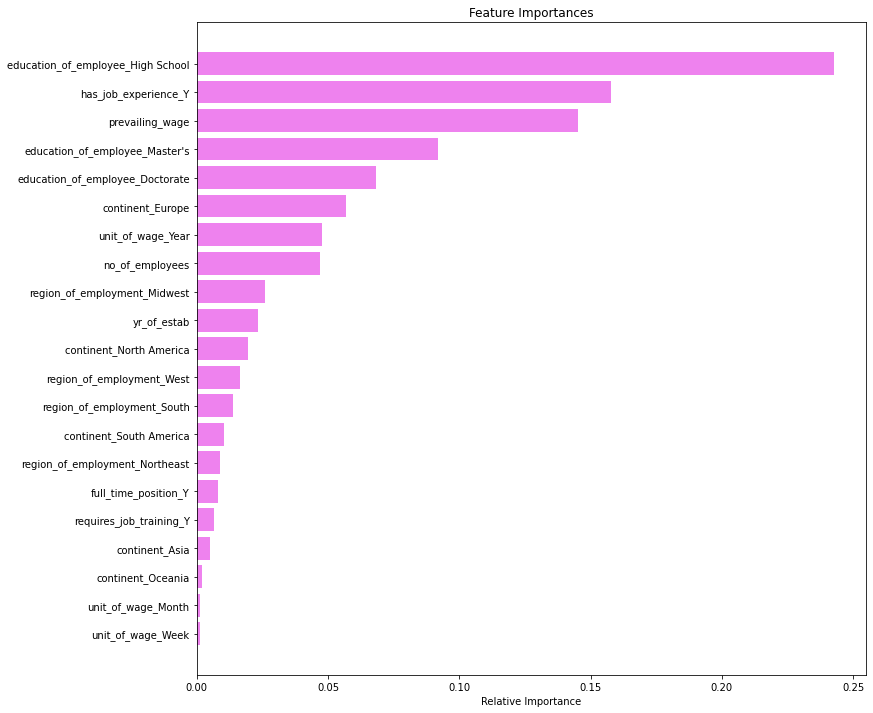

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
* Most important feature is having high school education.
* 2nd is job expereince, followed by prevailing wage, education of a Master's and then Doctorate.
* Several others are below this

##XGBoost

In [ ]:
xgb=XGBClassifier(random_state=1, verbosity = 0)
xgb.fit(X_train,y_train)

XGBClassifier(random_state=1, verbosity=0)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.754766  0.873944   0.782096  0.825473
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.75157  0.867619   0.787528  0.825636


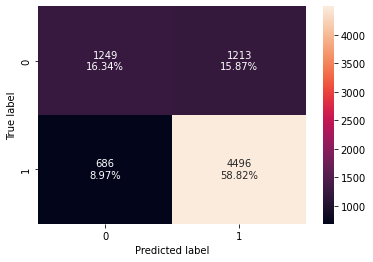

In [ ]:
#Calculating different metrics
xgb_train_perf=model_performance_classification_sklearn(xgb,X_train,y_train)
print("Training performance:\n",xgb_train_perf)
xgb_test_perf=model_performance_classification_sklearn(xgb,X_test,y_test)
print("Testing performance:\n",xgb_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb, X_test, y_test)

### Insights
* The model is fitting the data nicely

##Tuning XG Boost

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric = "logloss")

# Grid of parameters to choose from
parameters = {'n_estimators': [150, 250, 50],
              'scale_pos_weight' : [1, 2],
              'subsample':[0.9, 1],
              'learning_rate': np.arange(0.1, 0.21, 0.1 ),
              'gamma':[3, 5],
              'colsample_bytree':[0.8, 0.9],
              'colsample_bylevel':[0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.9, eval_metric='logloss', gamma=3,
              n_estimators=50, random_state=1, subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.750112  0.879858   0.774333  0.823729
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.751701  0.874952   0.783887  0.82692


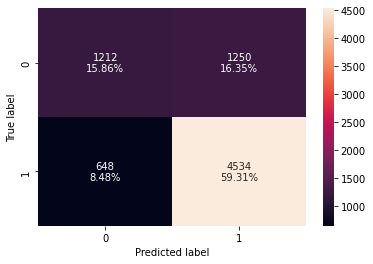

In [ ]:
#Calculating different metrics
xgb_tuned_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_train_perf)
xgb_tuned_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.254576
has_job_experience_Y               0.116238
education_of_employee_Master's     0.100773
unit_of_wage_Year                  0.091312
education_of_employee_Doctorate    0.074898
continent_Europe                   0.058157
prevailing_wage                    0.049609
region_of_employment_Northeast     0.048283
region_of_employment_Midwest       0.040916
region_of_employment_West          0.029440
region_of_employment_South         0.028068
continent_North America            0.023821
continent_South America            0.020472
full_time_position_Y               0.018098
continent_Asia                     0.016711
requires_job_training_Y            0.011284
yr_of_estab                        0.008877
no_of_employees                    0.008467
continent_Oceania                  0.000000
unit_of_wage_Month                 0.000000
unit_of_wage_Week                  0.000000


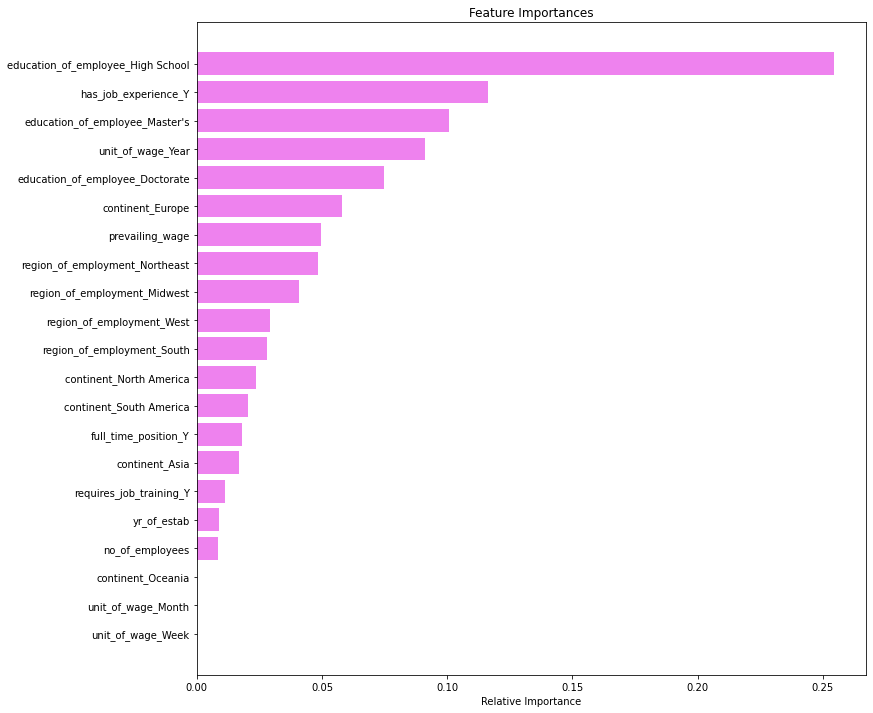

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
* XG boost models tuned and un-tuned fit the data nicely.
* Performance between the two models is similar.
* The top two importance factors are the same for Gradient Boost and XGBoost, however, after that they are slightly different.

###Stacking Classifier

**Now, let's build a stacking model with the tuned models - decision tree, bagging classifer, and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Decision Tree', dtree_estimator),('Bagging Classifier', bagging_classifier),
           ('Gradient Boosting', gbc_tuned)]

final_estimator = xgb_tuned
final_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=1,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=3,
                                                       random_state=1)),
                               ('Bagging Classifier',
                                BaggingClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0...
                                                                                          random_state=1)),
            

Training performance:
    Accuracy    Recall  Precision        F1
0  0.771305  0.883407   0.794831  0.836781
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.747384  0.862215   0.785928  0.822306


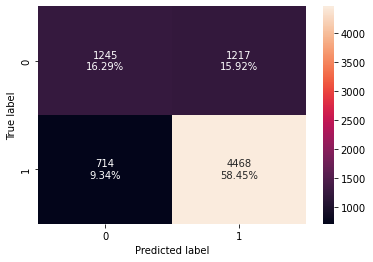

In [ ]:
#Calculating different metrics
stacking_estimator_train_perf=model_performance_classification_sklearn(stacking_estimator,X_train,y_train)
print("Training performance:\n",stacking_estimator_train_perf)
stacking_estimator_test_perf=model_performance_classification_sklearn(stacking_estimator,X_test,y_test)
print("Testing performance:\n",stacking_estimator_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_estimator, X_test, y_test)

### Insights
* The stacking classifier is fitting the data nicely

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T, abc_train_perf.T, abc_tuned_train_perf.T, gbc_train_perf.T, gbc_tuned_train_perf.T, xgb_train_perf.T, xgb_tuned_train_perf.T, stacking_estimator_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Ada Boost",
    "Ada Boost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XG Boost",
    "XG Boost Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Ada Boost,Ada Boost Tuned,Gradient Boost,Gradient Boost Tuned,XG Boost,XG Boost Tuned,Stacking Classifier
Accuracy,1.0,0.707950,0.999944,0.765699,0.999944,0.996187,0.737441,0.718042,0.755607,0.760933,0.754766,0.750112,0.771305
Recall,1.0,0.931734,1.000000,0.910696,1.000000,0.999916,0.885941,0.780162,0.876479,0.877070,0.873944,0.879858,0.883407
Precision,1.0,0.714758,0.999916,0.775412,0.999916,0.994371,0.758810,0.791870,0.781704,0.787036,0.782096,0.774333,0.794831
F1,1.0,0.808949,0.999958,0.837627,0.999958,0.997135,0.817462,0.785973,0.826383,0.829617,0.825473,0.823729,0.836781


### Insights
* The bagging classifiers and random forest perform the best on the trained data.
* The worst performing model on the trained data is AdaBoost tuned model.

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T, bagging_estimator_tuned_model_test_perf.T, abc_test_perf.T, abc_tuned_test_perf.T, gbc_test_perf.T, gbc_tuned_test_perf.T, xgb_test_perf.T, xgb_tuned_test_perf.T, stacking_estimator_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Ada Boost",
    "Ada Boost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XG Boost",
    "XG Boost Tuned",
    "Stacking Classifier"]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Ada Boost,Ada Boost Tuned,Gradient Boost,Gradient Boost Tuned,XG Boost,XG Boost Tuned,Stacking Classifier
Accuracy,0.664050,0.717295,0.727368,0.749084,0.696102,0.733909,0.738488,0.718472,0.751308,0.750262,0.751570,0.751701,0.747384
Recall,0.742184,0.931301,0.833655,0.894056,0.773061,0.899074,0.885951,0.783674,0.870513,0.864724,0.867619,0.874952,0.862215
Precision,0.757385,0.727794,0.779502,0.771909,0.777411,0.755105,0.765294,0.797526,0.785752,0.787660,0.787528,0.783887,0.785928
F1,0.749708,0.817066,0.805670,0.828505,0.775230,0.820825,0.821215,0.790539,0.825964,0.824395,0.825636,0.826920,0.822306


### Insights
* The Random Forest Tuned is the best performing model on the test data.
* The worst performing model on the test data is the Decision Tree model.

In [ ]:
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.231891
prevailing_wage                    0.156786
has_job_experience_Y               0.124603
education_of_employee_Master's     0.096773
no_of_employees                    0.066252
unit_of_wage_Year                  0.053460
yr_of_estab                        0.052961
education_of_employee_Doctorate    0.045970
continent_Europe                   0.034685
region_of_employment_Midwest       0.023519
continent_North America            0.016785
region_of_employment_South         0.016015
continent_Asia                     0.015997
region_of_employment_West          0.014438
full_time_position_Y               0.012698
requires_job_training_Y            0.011398
region_of_employment_Northeast     0.009016
continent_South America            0.008362
continent_Oceania                  0.003188
unit_of_wage_Week                  0.002760
unit_of_wage_Month                 0.002444


## Actionable Insights and Recommendations

- A `Approval Function` quantifies the error between predicted values and expected values and presents it in the form of a single real number.
- The OFLC can choose a model depending on their approval function which they want to maximize. The approval function can depend on the a number of importance facotrs.
- The OFLC's main aim would be to minimize time spent on applications that are most likely not going to be approved and spend more time on applicants that are likely going to be approved.
- We emphasized that F1 Score is the metric of interest here and we tuned our model on F1 Score. But this does not mean that other metrics should be ignored completely.
- Here, we assumed that the $approval\ on\ TP>approval\ on\ TN$., but we do not want to misclassify so many approvals that the equation is reversed i.e. $approval\ on\ TN>approval\ on\ TP$, hence, the OFLC will actually be missing qualified applicants.
-The most important factors in order of importance are as follows for approval:
  
education_of_employee_High School  
prevailing_wage                   
has_job_experience_Y               
education_of_employee_Master's     
no_of_employees                   
unit_of_wage_Year                  
yr_of_estab                        
education_of_employee_Doctorate    
continent_Europe                   
region_of_employment_Midwest       
continent_North America            
region_of_employment_South         
continent_Asia                     
region_of_employment_West          
full_time_position_Y               
requires_job_training_Y            
region_of_employment_Northeast     
continent_South America            
continent_Oceania                  
unit_of_wage_Week                 
unit_of_wage_Month                 


###Convert to html



In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#code to convert to html
%%shell
jupyter nbconvert --to html ///content/drive/MyDrive/Colab_Notebooks/CopyofEasyVisaFullCode.ipynb

[NbConvertApp] Converting notebook ///content/drive/MyDrive/Colab_Notebooks/CopyofEasyVisaFullCode.ipynb to html
[NbConvertApp] Writing 1232435 bytes to ///content/drive/MyDrive/Colab_Notebooks/CopyofEasyVisaFullCode.html
